# Setup

In [96]:
from itertools import product
from textwrap import dedent
from IPython.display import display, Markdown

import numpy as np
import matplotlib.pyplot as plt

In [3]:
stdata = np.load("RaspberryPi/SalvagedTrans.npz", allow_pickle=True)["data"][()]

In [58]:
def filter_tl431():
    """Filters data out where voltage on cathode has been clamped;
    returns copy of data so original is not changed.
    """
    tl431d = np.array(stdata["TL431"])
    for i1, i2 in product(range(tl431d.shape[0]), range(tl431d.shape[1])):
        if tl431d[i1, i2, 2] < 0.99*tl431d[i1, 0, 2]:
            for i3 in range(tl431d.shape[2]):
                tl431d[i1, i2, i3] = np.nan
    return tl431d    

# Parts

Three transistor(-type) parts were desoldered from the failed power supply:

| Part | Description |
|:-|:-|
| [FCP11N60](https://datasheet.octopart.com/FCP11N60-ON-Semiconductor-datasheet-137977744.pdf) | 600V, 11A, N-Channel SuperFET MOSFET |
| [FCP20N60](https://datasheet.octopart.com/FCP20N60-ON-Semiconductor-datasheet-5317142.pdf) | 600V, 20A, N-Channel SuperFET MOSFET |
| [TL431](https://en.wikipedia.org/wiki/TL431) | Precision Programmable Reference |


# Results

## TL431

I-V curves for the TL431

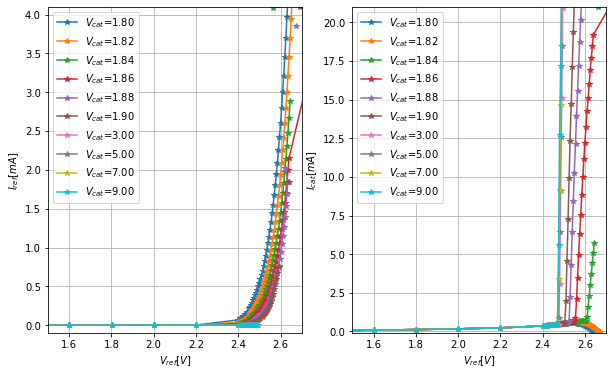

In [61]:
def _block():
    tl431d = filter_tl431()

    plt.figure(figsize=(10,6))

    for i in range(0, 20, 2):
        l = f"$V_{{cat}}$={tl431d[i, 0, 2]:.2f}"
        
        plt.subplot(1, 2, 1)
        plt.plot(tl431d[i, :, 0], 1e3*tl431d[i, :, 1], '-*', label=l)

        plt.subplot(1, 2, 2)
        plt.plot(tl431d[i, :, 0], 1e3*tl431d[i, :, 3], '-*', label=l)

    plt.subplot(1, 2, 1)
    plt.xlabel("$V_{ref} [V]$")
    plt.ylabel("$I_{ref} [mA]$")
    plt.axis([1.5, 2.7, -0.1, 4.1])
    plt.legend()
    plt.grid("on")

    plt.subplot(1, 2, 2)
    plt.xlabel("$V_{ref} [V]$")
    plt.ylabel("$I_{cat} [mA]$")
    plt.axis([1.5, 2.7, -0.1, 21])
    plt.legend()
    plt.grid("on")

    plt.show()
_block()

## N-Channel SuperFETs

I-V curves for FCP11N60 and FCP20N60

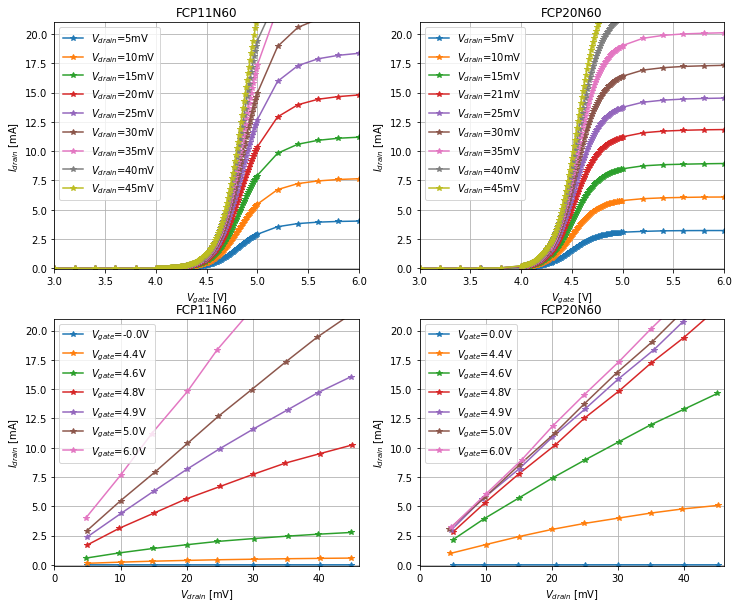

In [93]:
def _block():
    plt.figure(figsize=(12,10))
    
    d = stdata["FCP11N60"]

    plt.subplot(2, 2, 1)
    for i in range(d.shape[0]):
        l = f"$V_{{drain}}$={1e3*d[i, 0, 2]:.0f}mV"
        plt.plot(d[i, :, 0], 1e3*d[i, :, 3], '-*', label=l)
    plt.axis([3, 6, -0.1, 21])
    plt.title("FCP11N60")
    plt.xlabel("$V_{gate}$ [V]")
    plt.ylabel("$I_{drain}$ [mA]")
    plt.legend()
    plt.grid("on")

    plt.subplot(2, 2, 3)
    for i in (0, 60, 80, 100, 110, 120, -1):
        l = f"$V_{{gate}}$={d[0, i, 0]:.1f}V"
        plt.plot(1e3*d[:, i, 2], 1e3*d[:, i, 3], '-*', label=l)
    plt.axis([0, 46, -0.1, 21])
    plt.title("FCP11N60")
    plt.xlabel("$V_{drain}$ [mV]")
    plt.ylabel("$I_{drain}$ [mA]")
    plt.legend()
    plt.grid("on")

    d = stdata["FCP20N60"]

    plt.subplot(2, 2, 2)
    for i in range(d.shape[0]):
        l = f"$V_{{drain}}$={1e3*d[i, 0, 2]:.0f}mV"
        plt.plot(d[i, :, 0], 1e3*d[i, :, 3], '-*', label=l)
    plt.axis([3, 6, -0.1, 21])
    plt.title("FCP20N60")
    plt.xlabel("$V_{gate}$ [V]")
    plt.ylabel("$I_{drain}$ [mA]")
    plt.legend()
    plt.grid("on")

    plt.subplot(2, 2, 4)
    for i in (0, 60, 80, 100, 110, 120, -1):
        l = f"$V_{{gate}}$={d[0, i, 0]:.1f}V"
        plt.plot(1e3*d[:, i, 2], 1e3*d[:, i, 3], '-*', label=l)
    plt.axis([0, 46, -0.1, 21])
    plt.title("FCP20N60")
    plt.xlabel("$V_{drain}$ [mV]")
    plt.ylabel("$I_{drain}$ [mA]")
    plt.legend()
    plt.grid("on")

    plt.show()
_block()

We can compute the on resistance when $V_{gate}$ is 6.0V by dividing the highest drain voltage with the drain current.

In [103]:
def _block():
    s = dedent("""
        | Part | $R_{on}$ |
        |:-|:-|
    """)
    for s_t in ("FCP11N60", "FCP20N60"):
        d = stdata[s_t]
        r = d[-1, -1, 2]/d[-1, -1, 3] # R = V/I
        s += f"| {s_t} | {r:.2f}Ω |\n"
    display(Markdown(s))
_block()


| Part | $R_{on}$ |
|:-|:-|
| FCP11N60 | 1.36Ω |
| FCP20N60 | 1.73Ω |


## Overview

Joined graph of drain/cathode current as a function of gate/ref voltage

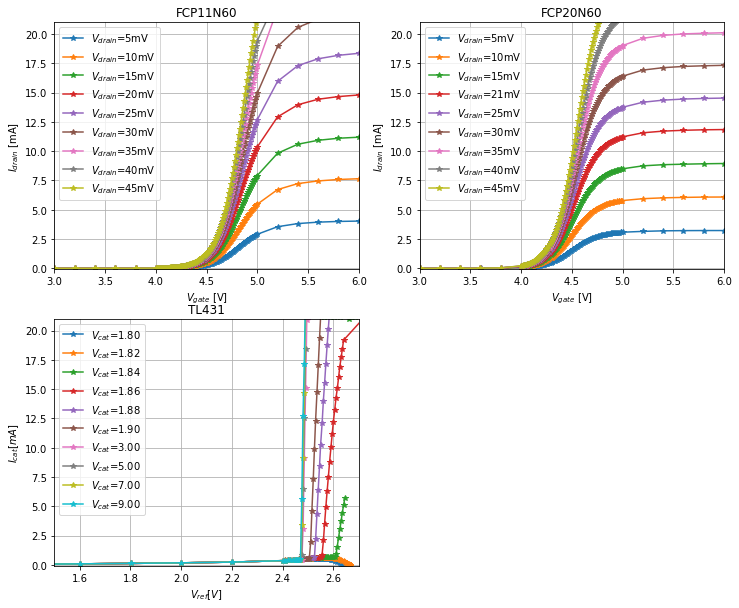

In [105]:
def _block():
    plt.figure(figsize=(12,10))
    
    d = stdata["FCP11N60"]

    plt.subplot(2, 2, 1)
    for i in range(d.shape[0]):
        l = f"$V_{{drain}}$={1e3*d[i, 0, 2]:.0f}mV"
        plt.plot(d[i, :, 0], 1e3*d[i, :, 3], '-*', label=l)
    plt.axis([3, 6, -0.1, 21])
    plt.title("FCP11N60")
    plt.xlabel("$V_{gate}$ [V]")
    plt.ylabel("$I_{drain}$ [mA]")
    plt.legend()
    plt.grid("on")

    d = stdata["FCP20N60"]

    plt.subplot(2, 2, 2)
    for i in range(d.shape[0]):
        l = f"$V_{{drain}}$={1e3*d[i, 0, 2]:.0f}mV"
        plt.plot(d[i, :, 0], 1e3*d[i, :, 3], '-*', label=l)
    plt.axis([3, 6, -0.1, 21])
    plt.title("FCP20N60")
    plt.xlabel("$V_{gate}$ [V]")
    plt.ylabel("$I_{drain}$ [mA]")
    plt.legend()
    plt.grid("on")

    d = filter_tl431()

    plt.subplot(2, 2, 3)
    for i in range(0, 20, 2):
        l = f"$V_{{cat}}$={d[i, 0, 2]:.2f}"

        plt.plot(d[i, :, 0], 1e3*d[i, :, 3], '-*', label=l)
    plt.xlabel("$V_{ref} [V]$")
    plt.ylabel("$I_{cat} [mA]$")
    plt.axis([1.5, 2.7, -0.1, 21])
    plt.title("TL431")
    plt.legend()
    plt.grid("on")

    plt.show()

_block()

Both the two n-channel MOSFETs and the TL431 can be turned of or on by a control voltage; the gate for the MOSFETs and the reference voltage for the TL431. Difference is that the MOSFETs act as a switch and the TL431 as a Zener diode. When the MOSFETs are on ($V_{gate}$ > 5-5.5V) current is flowing from drain to source with small drain-source voltage. When the TL431 is turned on ($V_{ref}$ > 2.5V) you also need a certain voltage on the cathode above 1.84V for current flowing from cathode to anode.